# Libaries

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv

In [ ]:
#data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv' # old data
# url = 'https://www.kaggle.com/code/shahraizanwar/age-gender-ethnicity-prediction/data?select=age_gender.csv'

# processing color data from Pierre

In [ ]:
 # new data from Pierre
data_path = '/home/gonzalez/code/jagonzalezj/age_gender/raw_data/new_data.csv' 
data = pd.read_csv(data_path, encoding='utf-8')

lola =[]   
for i in range(len(data['image'])):
    a = data['image'][i].replace('[',',').replace(']',',').replace(',','').split()
    lola.append([int(j) for j in a])
    
data['image']=lola
data.columns=['age', 'gender', 'ethnicity', 'pixels']

data['ethnicity'].unique()[5:]
for items in data['ethnicity'].unique()[5:]:
    data = data.drop(data[data.ethnicity==items].index).copy()

data = data.dropna()
data.reindex()

# Loading data from google cloud to google colab

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/age_gender.csv')

# Transforming the pixels data type into a list of float

In [ ]:
# images =[]
# for fotos in range(len(data['pixels'])):
#     X = data['pixels'][fotos].split(" ")
#     X = list(map(int, X))
#     images.append(X)

In [ ]:
# x = np.reshape(images[5000], (48,48))

In [ ]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
blob = data['pixels'][0].reshape(48,48)

In [ ]:
plt.imshow(blob, cmap='gray');

In [ ]:
#sns.displot(data['ethnicity']),
#sns.displot(data['gender']), 
#sns.displot(data['age']);
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot(ax=axes[0], x=data['age']);
sns.histplot(ax=axes[1], x=data['ethnicity']);
sns.histplot(ax=axes[2], x=data['gender']);

# Working with the age

In [ ]:
# list the number of counts per age
ages = data['age'].unique()
counts = []
for age in ages:
    counts.append(np.count_nonzero(data['age']==age))

In [ ]:
# table with the first 15 most dense samples regarding age
type(ages), type(counts)
s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
s=s.transpose()
more_dense = s.sort_values(by=['counts'], ascending=False)
more_dense.head(15)

In [ ]:
data = data.drop(data[data.age==29].index).copy()
data.reset_index(drop=True)

In [ ]:
sns.histplot(data.age);

The filter of Pierre

In [ ]:
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=10)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
data

# External image manipulation funtions

In [ ]:
import cv2
import sys, os

In [ ]:
# get image
#locattion = "/home/gonzalez/foto.jpg" # javier
#locattion = "/home/gonzalez/Paul.jpeg" # Paul
#locattion = "/home/gonzalez/Konstantine.jpeg"
locattion = "/home/gonzalez/ping.jpg" # Paul



In [ ]:
#base_dir = os.path.dirname(locattion)
#image = cv2.imread("/home/gonzalez/foto.jpg")
#plt.imshow(image, cmap='gray');
#print(f'==> image resolution {image.shape}')

# from PIL import Image           # this can be used to rotate images
# image = Image.open(locattion)

# (h, w) = image.shape[:2]
# blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
# #blob.shape
# blob.shape

In [ ]:
imagePath=locattion
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=3,
    minSize=(30, 30)
)

print("[INFO] Found {0} Faces.".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0),1)
    roi_color = image[y:y + h, x:x + w]
    #print("[INFO] Object found. Saving locally.")
    #cv2.imwrite(str(w) + str(h) + '_faces.jpg', roi_color)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,16))

ax1.imshow(image) # original image

ax2.imshow(roi_color) # recorted original image
roi_color.shape

img = np.mean(roi_color, axis=2) # black and white image
ax3.imshow(img, cmap='gray');

img=img[2:,2:]  # remove red line effect

res_final = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_LINEAR)
ax4.imshow(res_final, cmap='gray');


In [ ]:
res_final.shape
res_final_ready = np.reshape(res_final, (-1, 48, 48,1))
res_final_ready.shape

In [ ]:
# model.predict(res_final_ready)
# index = np.where(model.predict(res_final_ready)==(model.predict(res_final_ready).max()))
# index[1][0]

In [ ]:
#model = models.load_model('Model48_datafiltered/')
int(model.predict(res_final_ready)[0][0])

#model.predict(res_final_ready)
#index = np.where(model.predict(res_final_ready)==(model.predict(res_final_ready).max()))
#print(f'slot number {index[1][0]}, correspond to range {index[1][0]*step_size-step_size} to {index[1][0]*step_size}')

In [ ]:
# resize image

In [ ]:
# image conver to black and white
#image = cv2.imread(imagePath)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function for transforming data numbers into data range classification

In [11]:
# categorize age per range:
def age_categorize(input_list, age_step=10):
    '''
    Enter the list of age into input_list and the age steps
    with : age_step = 5;  age = 4   =>  1-5
                          age = 12  =>  10-15                        
    '''
    
    cat_age = []
    for age in input_list:
        
        a = float(age)/float(age_step)
        
        if a > 1:
            entero = int(a)
            coma = a-entero
            
            if coma > 0:
                entero = entero+1
            
            max = entero * age_step
            min = max-(age_step-1)     
            #cat_age.append(f'{min} to {max}')   # if the output is in the real intervale
            cat_age.append(int(max/age_step)-1)  # if the output is in categorical int number
        else:
            min = 1
            max = age_step
            #cat_age.append(f'{min} to {max}')    # if the output is in the real intervale   
            cat_age.append(int(max/age_step)-1)   # if the output is in categorical int number

            
    return cat_age

# Here we go with the model

In [ ]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

In [ ]:
# X = data['pixels'].tolist()
# X = np.reshape(X, (-1, 48, 48,1))


X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,3))

y=data['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen=ImageDataGenerator(rescale=1/255)
# train_generator_age=train_datagen.flow(
#     X_train ,y_train ,batch_size=32)

# test_datagen=ImageDataGenerator(rescale=1/255)
# test_generator_age=test_datagen.flow(
#     X_test ,y_test ,batch_size=32)

In [ ]:
def initialize_model(numb_int, numb_out):
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,numb_int)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

In [ ]:
model = initialize_model(X.shape[-1], y.shape[-1])
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='mae', patience=6, restore_best_weights=True)

# earlystop=EarlyStopping(patience=6)
# learning_rate_reduction=ReduceLROnPlateau(
#     monitor='val_acc',
#     patience= 3,
#     verbose=1,
# )
# callbacks = [earlystop, learning_rate_reduction]

In [ ]:
X_train.shape

In [ ]:
# history_age = model.fit(
#     train_generator_age, 
#     epochs= 60,
#     validation_data= test_generator_age,
#     callbacks= callbacks)

In [ ]:
#history = model.fit(X_train, y_train, epochs=40, callbacks=[es])

In [ ]:
history = model.fit(X, y, validation_split=0.3, epochs=40, callbacks=[es], batch_size=32)

In [ ]:
#history.__dict__

In [ ]:
plt.plot(history.history['loss']);
plt.plot(history.history['mae']);

In [ ]:
models.save_model(model, 'Model48_linearColor')
#model = models.load_model('Model48')

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
n=142
plt.imshow(X[n] );
data.iloc[n]

In [ ]:
#out= model.predict(X_test)
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp)[0,0]

In [ ]:
np.shape(X[0])

# MODEL USING DATA BUCKET

In [ ]:
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

In [ ]:
step_size = 5
input_list = data['age']
cat = age_categorize(input_list, step_size)
#pd.DataFrame(cat, data['age'].values).sample(100)

In [ ]:
# add categorical age clasification to original dataframe
data['class_age']=cat
#data[['age','class_age']].sample(10)

In [ ]:
sns.histplot(data['class_age']);

In [ ]:
### perform one-hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['class_age']])
class_age_encoded = ohe.transform(data[['class_age']])

In [ ]:
data

 Using Pierre distribution

In [ ]:
# Pierre distribution
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=10)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
# perform one-hot encoder to the Pierre distribution
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [ ]:
for elements in range(class_age_encoded.shape[1]):      # =====> THIS IS NEED WHATHERVER HOT ENCODER USED  <=====
    data[str(elements)]=class_age_encoded[:,elements]

In [ ]:
y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'points_bin'])

Finished Pierre encoding

In [ ]:
#y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'class_age'])
#y=data.drop(columns=['age','ethnicity','gender', 'img_name', 'pixels', 'points_bin'])

In [ ]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,3))

y = class_age_encoded

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
def initialize_model_catgorical(numb_int, numb_out):
        
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(48,48,numb_int)))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
   
    #model.add(layers.Flatten())
    #model.add(layers.Dense(128,activation='relu'))

    model.add(layers.Dense(numb_out, activation='softmax'))   
    return model

In [ ]:
#model = initialize_model_catgorical()
model = initialize_model_catgorical(X.shape[-1], y.shape[-1])

model.summary()

In [ ]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='accuracy', patience=6, restore_best_weights=True)

In [ ]:
history_cat = model.fit(X_train,y_train, validation_split=0.3, epochs=50, callbacks=[es])

In [ ]:
#history_cat = model.fit(X, y, validation_split=0.3, epochs=40, callbacks=[es], batch_size=32)  # the best

In [ ]:
models.save_model(model, 'Model48_categorical_ColorData')

In [ ]:
plt.plot(history_cat.history['val_accuracy']);
plt.plot(history_cat.history['accuracy']);

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
n=244
plt.imshow(X[n], cmap='gray');
#np.where(y.iloc[n]==1)[0]
print(f"real age is {data.iloc[n]}")

In [ ]:
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp).max()
index = np.where(model.predict(try_inp)==(model.predict(try_inp).max()))
index[1][0]

In [ ]:
model.predict(try_inp)

In [ ]:
try_inp = np.expand_dims(X[n], axis=0)
model.predict(try_inp).max()
index = np.where(model.predict(try_inp)==(model.predict(try_inp).max()))
print(f'slot number {index[1][0]}, correspond to range {index[1][0]*step_size-step_size} to {index[1][0]*step_size}')

# best results using colab with regression on virgen data

In [ ]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv

from google.colab import drive 
drive.mount('/content/gdrive')
data=pd.read_csv('gdrive/My Drive/age_gender.csv')

data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y = data['age']


def initialize_model():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

model = initialize_model()
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

history = model.fit(X_train, y_train, epochs=100, callbacks=[es])

plt.plot(history.history['loss']);
plt.plot(history.history['mae']);

n=5
out = np.reshape(X_test[n], (48, 48))
plt.imshow(out, cmap='gray');
y_test.iloc[n]

try_inp = np.expand_dims(X_test[n], axis=0)
model.predict(try_inp)[0,0]

# Combination of categorical plus linear for BW images

In [2]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import csv
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

## models

In [3]:
def initialize_model_regression():
    
    model = Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
   
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128,(3,3),activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Dropout(0.2))          

    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(1, activation='relu'))
   
    return model

In [4]:
def initialize_model_catgorical(numb_int, numb_out):
        
    model = Sequential()
    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu',input_shape=(48,48,numb_int)))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(32,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Conv2D(64,(3,3), padding='same',activation='relu'))
    model.add(layers.MaxPooling2D(2,2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
   
    #model.add(layers.Flatten())
    #model.add(layers.Dense(128,activation='relu'))

    model.add(layers.Dense(numb_out, activation='softmax'))   
    return model

## load the data

In [5]:
data_path = '/home/gonzalez/Desktop/age_gender/age_gender.csv' # old data
data = pd.read_csv(data_path)
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

## FILTERING THE DATA

In [6]:
# list the number of counts per age
ages = data['age'].unique()
counts = []
for age in ages:
    counts.append(np.count_nonzero(data['age']==age))

In [7]:
# table with the first 15 most dense samples regarding age
type(ages), type(counts)
s =pd.DataFrame([ages.T, np.array(counts).T],['ages', 'counts'])
s=s.transpose()
more_dense = s.sort_values(by=['counts'], ascending=False)
more_dense.head(15)

,ages,counts
26,26,2197
0,1,1123
28,28,918
36,35,880
24,24,859
25,25,734
31,30,724
33,32,664
27,27,615
29,29,570


In [8]:
data = data.drop(data[data.age==26].index).copy()
data = data.drop(data[data.age<2].index).copy()
data = data.drop(data[data.age>70].index).copy()

data.reset_index(drop=True)

,age,ethnicity,gender,img_name,pixels
0,10,0,0,20170110225414790.jpg.chip.jpg,"[30.0, 38.0, 50.0, 90.0, 109.0, 113.0, 126.0, ..."
1,10,0,0,20170110225417177.jpg.chip.jpg,"[72.0, 81.0, 94.0, 96.0, 77.0, 85.0, 90.0, 71...."
2,10,0,0,20170110224549512.jpg.chip.jpg,"[255.0, 253.0, 252.0, 221.0, 144.0, 174.0, 165..."
3,10,0,0,20170110225402690.jpg.chip.jpg,"[62.0, 53.0, 55.0, 62.0, 73.0, 74.0, 86.0, 94...."
4,10,0,0,20170110225421531.jpg.chip.jpg,"[28.0, 60.0, 55.0, 55.0, 74.0, 74.0, 62.0, 101..."
...,...,...,...,...,...
19155,9,0,0,20170110215653284.jpg.chip.jpg,"[73.0, 66.0, 78.0, 108.0, 112.0, 124.0, 128.0,..."
19156,9,0,0,20170110215848132.jpg.chip.jpg,"[74.0, 89.0, 51.0, 63.0, 69.0, 80.0, 94.0, 95...."
19157,9,0,0,20170110220005370.jpg.chip.jpg,"[98.0, 90.0, 90.0, 111.0, 133.0, 149.0, 169.0,..."
19158,9,0,0,20170110220016235.jpg.chip.jpg,"[57.0, 74.0, 93.0, 92.0, 110.0, 124.0, 130.0, ..."


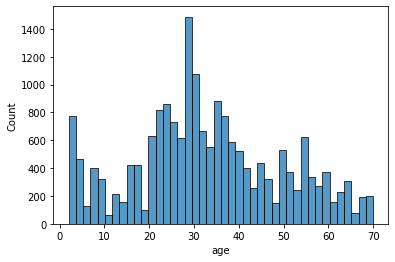

In [9]:
sns.histplot(data.age);

Steping and encoding

In [12]:
step_size = 10
input_list = data['age']
cat = age_categorize(input_list, step_size)  # ====>>  INITIALIZE THIS FUNCTION  <<=========

#pd.DataFrame(cat, data['age'].values).sample(100)

In [13]:
# add categorical age clasification to original dataframe
data['points_bin']=cat
#data[['age','class_age']].sample(10)

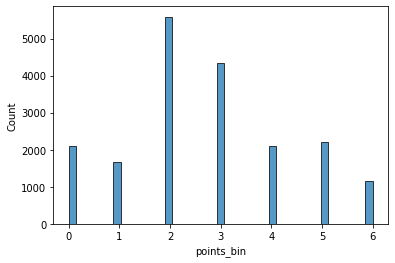

In [14]:
sns.histplot(data['points_bin']);

In [15]:
### perform one-hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [16]:
for elements in range(class_age_encoded.shape[1]):      # =====> THIS IS NEED WHATHERVER HOT ENCODER USED  <=====
    data[str(elements)]=class_age_encoded[:,elements]

In [56]:
data.sample(10)

,age,ethnicity,gender,img_name,pixels,points_bin,0,1,2,3,4,5,6
20196,58,0,0,20170120224611152.jpg.chip.jpg,"[166.0, 107.0, 100.0, 80.0, 82.0, 73.0, 62.0, ...",5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17413,47,3,0,20170119205212904.jpg.chip.jpg,"[147.0, 146.0, 136.0, 132.0, 145.0, 154.0, 160...",4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16383,42,0,0,20170117154836485.jpg.chip.jpg,"[79.0, 99.0, 104.0, 110.0, 124.0, 128.0, 139.0...",4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9068,28,2,1,20170116172433974.jpg.chip.jpg,"[20.0, 20.0, 22.0, 19.0, 23.0, 22.0, 14.0, 75....",2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22805,8,0,1,20170117154607954.jpg.chip.jpg,"[81.0, 92.0, 103.0, 103.0, 95.0, 114.0, 132.0,...",0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8924,27,0,0,20170117175613066.jpg.chip.jpg,"[12.0, 11.0, 11.0, 10.0, 10.0, 14.0, 10.0, 13....",2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15243,39,3,1,20170104234641563.jpg.chip.jpg,"[2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 4.0, 9.0, 22.0,...",3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2137,16,0,1,20170109203419299.jpg.chip.jpg,"[38.0, 44.0, 73.0, 89.0, 119.0, 143.0, 196.0, ...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2661,19,4,1,20170109192214298.jpg.chip.jpg,"[149.0, 151.0, 151.0, 153.0, 152.0, 147.0, 114...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13782,35,0,1,20170108225911130.jpg.chip.jpg,"[17.0, 36.0, 52.0, 61.0, 88.0, 108.0, 131.0, 1...",3,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## If using piere fiter

In [ ]:
# Pierre distribution
data_clean = data.copy()
data['points_bin'] = pd.qcut(data_clean['age'], q=3)

#view updated DataFrame
print(data)
data['points_bin'].value_counts()

In [ ]:
# perform one-hot encoder to the Pierre distribution
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
ohe.fit(data[['points_bin']])
class_age_encoded = ohe.transform(data[['points_bin']])

In [ ]:
for elements in range(class_age_encoded.shape[1]):
    data[str(elements)]=class_age_encoded[:,elements]

## categorical fit

In [101]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))

y=data.drop(columns=['age','ethnicity','gender', 'pixels', 'points_bin', 'img_name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
data

In [19]:
model_cat = initialize_model_catgorical(X.shape[-1], y.shape[-1])
    
es = EarlyStopping(monitor='accuracy', patience=6, restore_best_weights=True)

model_cat.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])

history_cat = model_cat.fit(X_train,y_train, validation_split=0.3, epochs=50, callbacks=[es])

Epoch 1/50
294/294 [==============================] - 14s 46ms/step - loss: 2.5584 - accuracy: 0.3204 - val_loss: 1.5902 - val_accuracy: 0.3782
Epoch 2/50
294/294 [==============================] - 13s 45ms/step - loss: 1.5127 - accuracy: 0.3951 - val_loss: 1.4612 - val_accuracy: 0.4302
Epoch 3/50
294/294 [==============================] - 13s 45ms/step - loss: 1.4158 - accuracy: 0.4297 - val_loss: 1.4026 - val_accuracy: 0.4404
Epoch 4/50
294/294 [==============================] - 13s 46ms/step - loss: 1.3465 - accuracy: 0.4515 - val_loss: 1.3746 - val_accuracy: 0.4493
Epoch 5/50
294/294 [==============================] - 13s 45ms/step - loss: 1.3025 - accuracy: 0.4691 - val_loss: 1.4699 - val_accuracy: 0.4058
Epoch 6/50
294/294 [==============================] - 13s 45ms/step - loss: 1.2635 - accuracy: 0.4898 - val_loss: 1.3299 - val_accuracy: 0.4679
Epoch 7/50
294/294 [==============================] - 13s 45ms/step - loss: 1.2270 - accuracy: 0.4989 - val_loss: 1.3681 - val_accuracy:

In [98]:
models.save_model(model_cat,'Model_cat_10')

INFO:tensorflow:Assets written to: Model_cat_10/assets


In [102]:
model_cat.evaluate(X_test, y_test)

180/180 [==============================] - 2s 10ms/step - loss: 4.6925 - accuracy: 0.4261


[4.692539215087891, 0.4260612428188324]

# calling once the categorical branch model is done

In [66]:
lower = data['points_bin'].unique()[1]
upper = data['points_bin'].unique()[2]

cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()
cacho['age'].unique()

/tmp/ipykernel_12149/3079341222.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [76]:
# looping for all linear model
Histories = []

y = data['age']

for i in range(len(data['points_bin'].unique())):


    # slice the dataframe
    
    #lower = data['points_bin'].unique()[i].left  # ====>>  USING PIERRE FORMAT  <<=========
    #upper = data['points_bin'].unique()[i].right
    #cacho = data.drop(data[data.age<lower].index | data[data.age>=upper].index).copy()
    
    lower = data['points_bin'].unique()[i]   # ====>>  USING JAVIER FORMAT  <<=========
    upper = data['points_bin'].unique()[i+1]
    cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()

    
    # prepare the data
    X = cacho['pixels'].tolist()
    X = np.reshape(X, (-1, 48, 48,1))

    y=cacho['age']

    # split data set
    X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=1)
    
    
    print(' ')
    print('*****************************************************************************************')
    print(f'STARTING MODEL =======>>>>>> {i} with age range {y.min()} to {y.max()} and {X.shape} samples')
    print('*****************************************************************************************')
    print(' ')


    # initialize the model
    model = initialize_model_regression()
        
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    # early stopping
    es = EarlyStopping(monitor='mae', patience=6, restore_best_weights=True)


    # fit
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=40, callbacks=[es])
    
    # save model
    Histories.append(history)
    
    models.save_model(model, f'Model_linear_{y.min()}_{y.max()}')
    
    # delete variables to save RAM
    del model, X, y, X_train, X_test, y_train, y_test, es, history, cacho
    

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


 
*****************************************************************************************
STARTING MODEL =======>>>>>> 0 with age range 2 to 10 and (2095, 48, 48, 1) samples
*****************************************************************************************
 
Epoch 1/40
33/33 [==============================] - 2s 55ms/step - loss: 37.6271 - mae: 5.2998 - val_loss: 34.2591 - val_mae: 5.1909
Epoch 2/40
33/33 [==============================] - 2s 51ms/step - loss: 34.4727 - mae: 5.2037 - val_loss: 34.2591 - val_mae: 5.1909
Epoch 3/40
33/33 [==============================] - 2s 52ms/step - loss: 34.4727 - mae: 5.2037 - val_loss: 34.2591 - val_mae: 5.1909
Epoch 4/40
33/33 [==============================] - 2s 58ms/step - loss: 34.4727 - mae: 5.2037 - val_loss: 34.2591 - val_mae: 5.1909
Epoch 5/40
33/33 [==============================] - 2s 53ms/step - loss: 34.4727 - mae: 5.2037 - val_loss: 34.2591 - val_mae: 5.1909
Epoch 6/40
33/33 [==============================] - 2s 54ms/step - 

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


26/26 [==============================] - 2s 58ms/step - loss: 176.3480 - mae: 11.3718 - val_loss: 21.3121 - val_mae: 3.8810
Epoch 2/40
26/26 [==============================] - 1s 51ms/step - loss: 26.1087 - mae: 4.1729 - val_loss: 30.8619 - val_mae: 4.8878
Epoch 3/40
26/26 [==============================] - 1s 51ms/step - loss: 22.0575 - mae: 3.7535 - val_loss: 22.1034 - val_mae: 4.0272
Epoch 4/40
26/26 [==============================] - 1s 51ms/step - loss: 20.4305 - mae: 3.6611 - val_loss: 25.0190 - val_mae: 4.3355
Epoch 5/40
26/26 [==============================] - 1s 51ms/step - loss: 20.0371 - mae: 3.5918 - val_loss: 26.2639 - val_mae: 4.4712
Epoch 6/40
26/26 [==============================] - 1s 52ms/step - loss: 20.5351 - mae: 3.6493 - val_loss: 19.1092 - val_mae: 3.7142
Epoch 7/40
26/26 [==============================] - 1s 50ms/step - loss: 20.0335 - mae: 3.6384 - val_loss: 23.0262 - val_mae: 4.1466
Epoch 8/40
26/26 [==============================] - 1s 50ms/step - loss: 18.13

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


Epoch 1/40
86/86 [==============================] - 5s 51ms/step - loss: 93.1119 - mae: 7.3848 - val_loss: 104.0949 - val_mae: 9.4223
Epoch 2/40
86/86 [==============================] - 4s 49ms/step - loss: 47.2188 - mae: 5.5397 - val_loss: 91.7342 - val_mae: 8.7929
Epoch 3/40
86/86 [==============================] - 4s 50ms/step - loss: 43.6209 - mae: 5.3211 - val_loss: 43.7337 - val_mae: 5.5328
Epoch 4/40
86/86 [==============================] - 4s 50ms/step - loss: 40.4148 - mae: 5.1250 - val_loss: 54.7385 - val_mae: 6.4305
Epoch 5/40
86/86 [==============================] - 4s 50ms/step - loss: 38.4926 - mae: 5.0294 - val_loss: 21.8228 - val_mae: 3.7273
Epoch 6/40
86/86 [==============================] - 4s 49ms/step - loss: 36.7440 - mae: 4.8509 - val_loss: 62.2673 - val_mae: 7.0225
Epoch 7/40
86/86 [==============================] - 4s 50ms/step - loss: 37.0024 - mae: 4.8941 - val_loss: 46.8561 - val_mae: 5.8551
Epoch 8/40
86/86 [==============================] - 4s 50ms/step - l

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


Epoch 1/40
67/67 [==============================] - 4s 58ms/step - loss: 151.8703 - mae: 9.5505 - val_loss: 70.1125 - val_mae: 6.9793
Epoch 2/40
67/67 [==============================] - 4s 57ms/step - loss: 81.8252 - mae: 7.2832 - val_loss: 51.6337 - val_mae: 5.7777
Epoch 3/40
67/67 [==============================] - 4s 53ms/step - loss: 79.8201 - mae: 7.1984 - val_loss: 42.5600 - val_mae: 5.1569
Epoch 4/40
67/67 [==============================] - 4s 54ms/step - loss: 72.6316 - mae: 6.9203 - val_loss: 47.0208 - val_mae: 5.4605
Epoch 5/40
67/67 [==============================] - 4s 55ms/step - loss: 77.3397 - mae: 7.0758 - val_loss: 71.1899 - val_mae: 7.1901
Epoch 6/40
67/67 [==============================] - 4s 55ms/step - loss: 67.1034 - mae: 6.5672 - val_loss: 66.4528 - val_mae: 6.8938
Epoch 7/40
67/67 [==============================] - 4s 57ms/step - loss: 66.9983 - mae: 6.6425 - val_loss: 68.3306 - val_mae: 7.0662
Epoch 8/40
67/67 [==============================] - 4s 58ms/step - l

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


33/33 [==============================] - 3s 65ms/step - loss: 343.9244 - mae: 14.3348 - val_loss: 78.9123 - val_mae: 7.3090
Epoch 2/40
33/33 [==============================] - 2s 53ms/step - loss: 151.7918 - mae: 10.0048 - val_loss: 159.1344 - val_mae: 11.3277
Epoch 3/40
33/33 [==============================] - 2s 51ms/step - loss: 147.6188 - mae: 9.8278 - val_loss: 140.7015 - val_mae: 10.4954
Epoch 4/40
33/33 [==============================] - 2s 52ms/step - loss: 144.5565 - mae: 9.8450 - val_loss: 94.0317 - val_mae: 8.1536
Epoch 5/40
33/33 [==============================] - 2s 52ms/step - loss: 130.8853 - mae: 9.1590 - val_loss: 119.5683 - val_mae: 9.5056
Epoch 6/40
33/33 [==============================] - 2s 52ms/step - loss: 129.2013 - mae: 9.2474 - val_loss: 126.9339 - val_mae: 9.9155
Epoch 7/40
33/33 [==============================] - 2s 52ms/step - loss: 135.0017 - mae: 9.4096 - val_loss: 88.5473 - val_mae: 7.9456
Epoch 8/40
33/33 [==============================] - 2s 52ms/step 

/tmp/ipykernel_12149/4259728904.py:17: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  cacho = data.drop(data[data.points_bin<lower].index | data[data.points_bin>=upper].index).copy()


34/34 [==============================] - 2s 56ms/step - loss: 461.6826 - mae: 16.8186 - val_loss: 309.9901 - val_mae: 16.4180
Epoch 2/40
34/34 [==============================] - 2s 54ms/step - loss: 193.1326 - mae: 11.2592 - val_loss: 187.6344 - val_mae: 12.0700
Epoch 3/40
34/34 [==============================] - 2s 53ms/step - loss: 183.1595 - mae: 10.6981 - val_loss: 249.7050 - val_mae: 14.4414
Epoch 4/40
34/34 [==============================] - 2s 51ms/step - loss: 176.1805 - mae: 10.8327 - val_loss: 131.7844 - val_mae: 9.6717
Epoch 5/40
34/34 [==============================] - 2s 53ms/step - loss: 162.8271 - mae: 10.2393 - val_loss: 154.4710 - val_mae: 10.7400
Epoch 6/40
34/34 [==============================] - 2s 52ms/step - loss: 176.8447 - mae: 10.6689 - val_loss: 196.9455 - val_mae: 12.5229
Epoch 7/40
34/34 [==============================] - 2s 53ms/step - loss: 161.0581 - mae: 10.1389 - val_loss: 139.2899 - val_mae: 10.0892
Epoch 8/40
34/34 [==============================] - 2

IndexError: index 7 is out of bounds for axis 0 with size 7

In [73]:
y.max()

10

## Evaluation test categorical

In [83]:
X = data['pixels'].tolist()
X = np.reshape(X, (-1, 48, 48,1))


real age is age                                                           4
ethnicity                                                     2
gender                                                        0
img_name                         20161219211434893.jpg.chip.jpg
pixels        [116.0, 127.0, 132.0, 136.0, 139.0, 144.0, 150...
points_bin                                                    0
0                                                           1.0
1                                                           0.0
2                                                           0.0
3                                                           0.0
4                                                           0.0
5                                                           0.0
6                                                           0.0
Name: 15359, dtype: object


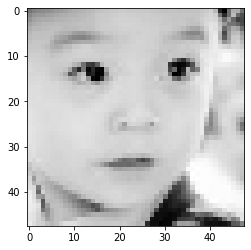

In [108]:
n=12007
plt.imshow(X[n], cmap='gray');
#np.where(y.iloc[n]==1)[0]
print(f"real age is {data.iloc[n]}")

In [109]:
try_inp = np.expand_dims(X[n], axis=0)
model_cat.predict(try_inp).max()
index = np.where(model_cat.predict(try_inp)==(model_cat.predict(try_inp).max()))
print(f'slot number {index[1][0]}, correspond to range {(index[1][0]+1)*step_size-step_size} to {(index[1][0]+1)*step_size}')

slot number 0, correspond to range 0 to 10


In [ ]:
#model_cat.predict(try_inp)

In [ ]:
# try_inp = np.expand_dims(X[n], axis=0)
# model_cat.predict(try_inp).max()
# index = np.where(model_cat.predict(try_inp)==(model_cat.predict(try_inp).max()))
# index[1][0]

## Evaluation test regresional

In [77]:
! ls

age_gender.csv:Zone.Identifier	Model_linear_2_10   Model_linear_51_60
images				Model_linear_21_30  Paul_Gender.ipynb
Javier_age.ipynb		Model_linear_31_40  Pierre-Ethnicity.ipynb
Model_linear_11_20		Model_linear_41_50


In [106]:
# load corresponding regresional model
predict_model = models.load_model('Model_linear_1_0')

In [107]:
# predict regresional
predict_model.predict(try_inp)

array([[24.807053]], dtype=float32)